In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/BISMARK/GESTION_2023/_CATASTRO/2022-01-19.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

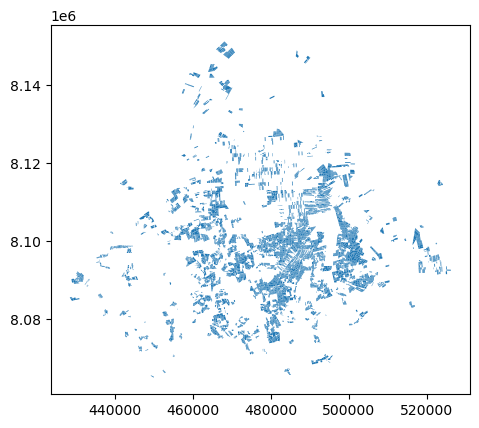

In [5]:
data.plot()
plt.show()

In [6]:
data

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,FY,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,2011-05-20,FY,11,canha,79,3.84,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,FY,4,canha,79,2.25,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,00005600000L3.1,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L3.1,UCG_90-20,2018-05-20,FY,4,canha,79,5.30,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,00005600000L5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L5,RENOVACION,None,F,122,renovacion,79,1.73,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12580,00002990000S7.3,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,S6.3,RBB 77-26,None,Y,1,canha,0,0.93,"POLYGON Z ((480241.833 8093166.959 0.000, 4802..."
12581,00002990000S11.2,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,S10.2,CITTCA 85-22,None,FA,2,canha,0,0.35,"POLYGON Z ((480500.935 8093284.514 0.000, 4804..."
12582,00002990000S4.2,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,S4.2,RENOVACION,None,FY,0,renovacion,0,0.81,"POLYGON Z ((479641.862 8093052.921 0.000, 4796..."
12583,00002990000S14.1,299,C.I.T.T.C.A,1530,C.I.T.T.C.A.,S13.2,UCG 90-20,None,Y,5,canha,0,1.75,"POLYGON Z ((480719.441 8093128.573 0.000, 4807..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

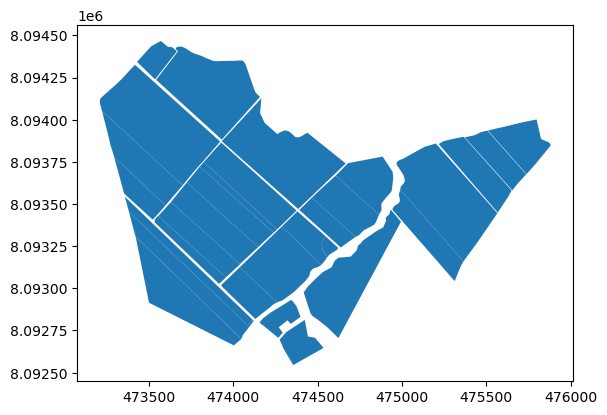

In [9]:
propiedad = data[data['unidad_01']==216]
propiedad.plot()
plt.show()

In [10]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,cultivo,zona,area,geometry
2639,00002160000L3.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.2,RB-2,2017-04-15,FA,5,canha,50,18.41,"POLYGON Z ((474156.791 8094134.330 0.000, 4739..."
2640,00002160000L4.1.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L4.1.2,UCG_90-20,2016-04-15,FA,6,canha,50,9.38,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2641,00002160000L3.1,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.1,RB-2,2016-04-15,FY,6,canha,50,20.28,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [11]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']

In [12]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,soca,cultivo,zona,area,geometry
2639,00002160000L3.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.2,RB-2,2017-04-15,FA,5,canha,50,18.41,"POLYGON Z ((474156.791 8094134.330 0.000, 4739..."
2640,00002160000L4.1.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L4.1.2,UCG_90-20,2016-04-15,FA,6,canha,50,9.38,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2641,00002160000L3.1,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.1,RB-2,2016-04-15,FY,6,canha,50,20.28,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."
2642,00002160000L7.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L7.2,RENOVACION,None,FY,122,renovacion,50,7.03,"POLYGON Z ((475649.777 8093580.297 0.000, 4756..."
2643,00002160000L7.3,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L7.3,CITTCA_85-22,2009-04-10,FA,13,canha,50,4.81,"POLYGON Z ((475371.661 8093895.187 0.000, 4754..."


In [13]:
num_columnas = len(propiedad.columns)
num_columnas

14

In [14]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [15]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,soca,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
2639,00002160000L3.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.2,RB-2,2017-04-15,FA,5,...,18.41,RB-2,2017-04-15,5,,0,75,216,00002160000L3.2,0
2640,00002160000L4.1.2,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L4.1.2,UCG_90-20,2016-04-15,FA,6,...,9.38,UCG_90-20,2016-04-15,6,,0,75,216,00002160000L4.1.2,0
2641,00002160000L3.1,216,LA_ESTACADA--AGUILERA,75,AGUILERA_TARADELLES_NELSON_MARIANO,L3.1,RB-2,2016-04-15,FY,6,...,20.28,RB-2,2016-04-15,6,,0,75,216,00002160000L3.1,0


In [16]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'soca', 'cultivo', 'zona', 'area', 'geometry',
       'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD', 'FECHA_SIEM', 'CORTE',
       'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP', 'ID', 'CUADRANTE'],
      dtype='object')

In [17]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [18]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
2639,"POLYGON Z ((474156.791 8094134.330 0.000, 4739...",L3.2,FA,18.41,RB-2,2017-04-15,5,,0,75,216,00002160000L3.2,0
2640,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",L4.1.2,FA,9.38,UCG_90-20,2016-04-15,6,,0,75,216,00002160000L4.1.2,0
2641,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",L3.1,FY,20.28,RB-2,2016-04-15,6,,0,75,216,00002160000L3.1,0
2642,"POLYGON Z ((475649.777 8093580.297 0.000, 4756...",L7.2,FY,7.03,RENOVACION,None,122,,0,75,216,00002160000L7.2,0
2643,"POLYGON Z ((475371.661 8093895.187 0.000, 4754...",L7.3,FA,4.81,CITTCA_85-22,2009-04-10,13,,0,75,216,00002160000L7.3,0


In [19]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [20]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [21]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [22]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
2639,"POLYGON Z ((474156.791 8094134.330 0.000, 4739...",L3.2,FA,18.41,RB-2,20170415,5,SOCA,0,75,216,00002160000L3.2,0
2640,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",L4.1.2,FA,9.38,UCG_90-20,20160415,6,SOCA,0,75,216,00002160000L4.1.2,0
2641,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",L3.1,FY,20.28,RB-2,20160415,6,SOCA,0,75,216,00002160000L3.1,0
2642,"POLYGON Z ((475649.777 8093580.297 0.000, 4756...",L7.2,FY,7.03,RENOVACION,0,122,RENOVACION,0,75,216,00002160000L7.2,0
2643,"POLYGON Z ((475371.661 8093895.187 0.000, 4754...",L7.3,FA,4.81,CITTCA_85-22,20090410,13,SOCA,0,75,216,00002160000L7.3,0


In [23]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [24]:
tchs = pd.read_excel(fp_tch)

In [25]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO '] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [26]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
2639,"POLYGON Z ((474156.791 8094134.330 0.000, 4739...",L3.2,FA,18.41,RB-2,20170415,5,SOCA,72.361904,75,216,00002160000L3.2,0
2640,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",L4.1.2,FA,9.38,UCG_90-20,20160415,6,SOCA,72.361904,75,216,00002160000L4.1.2,0
2641,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",L3.1,FY,20.28,RB-2,20160415,6,SOCA,72.361904,75,216,00002160000L3.1,0


In [27]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [28]:
bloques = pd.read_excel(fp_bloques)

In [29]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [30]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [31]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
2639,"POLYGON Z ((474156.791 8094134.330 0.000, 4739...",L3.2,FA,18.41,RB-2,20170415,5,SOCA,72.361904,75,216,00002160000L3.2,359
2640,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",L4.1.2,FA,9.38,UCG_90-20,20160415,6,SOCA,72.361904,75,216,00002160000L4.1.2,359
2641,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",L3.1,FY,20.28,RB-2,20160415,6,SOCA,72.361904,75,216,00002160000L3.1,359


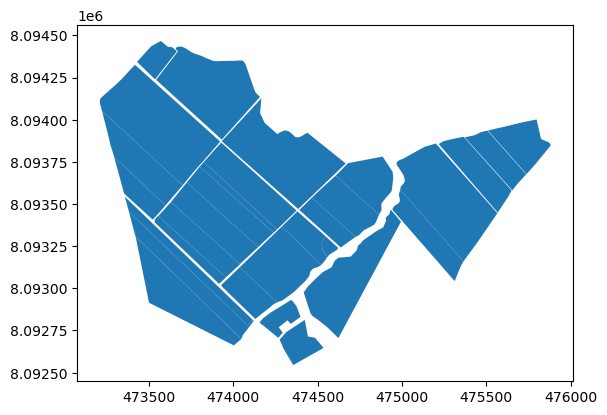

In [32]:
propiedad.plot()
plt.show()

In [33]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
propiedad = propiedad.to_crs(epsg=4326)

In [35]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
file_name + '.geojson'

'216_LA_ESTACADA--AGUILERA.geojson'

In [37]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\SPH_WGS84")

In [38]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [39]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\UTEA_2022\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\SPH_WGS84\\216_LA_ESTACADA--AGUILERA.geojson'

In [40]:
propiedad.to_file(out_dir, driver='GeoJSON')